Importaciones

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


Lectura de datos

In [3]:
df= pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


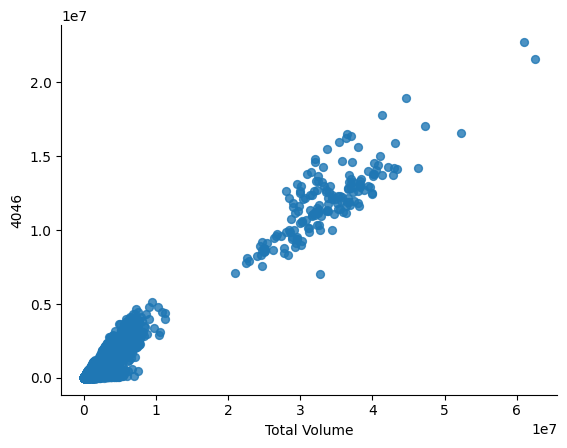

In [4]:
# @title Total Volume vs Plu 4046

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Total Volume', y='4046', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Cálculo de la Correlación entre Variables Independientes y Dependientes:

In [7]:
df_subset = df[['Total Volume','4046']]

def calcular_correlacion(x, y):
    correlacion = np.corrcoef(x, y)[0, 1]
    return correlacion
correlacion = calcular_correlacion(df['Total Volume'], df['4046'])
print("La correlación entre el Volumen total y Aguacates de plu 4046 es:", correlacion)


La correlación entre el Volumen total y aguacates de plu 4046 es: 0.97786315902292


Modelo de regresión lineal

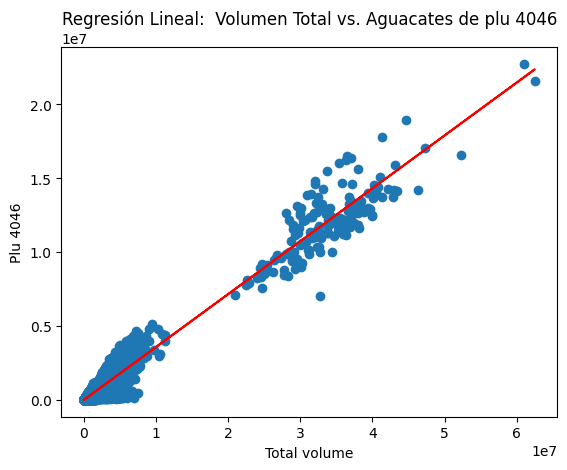

In [13]:
from sklearn.linear_model import LinearRegression

modelo_regresion = LinearRegression()
modelo_regresion.fit(df['Total Volume'].values.reshape(-1, 1), df['4046'])

plt.scatter(df['Total Volume'], df['4046'])
plt.plot(df['Total Volume'], modelo_regresion.predict(df['Total Volume'].values.reshape(-1, 1)), color='red')
plt.xlabel('Total volume')
plt.ylabel('Plu 4046')
plt.title('Regresión Lineal:  Volumen Total vs. Aguacates de plu 4046')
plt.show()

Regresión Polinomial

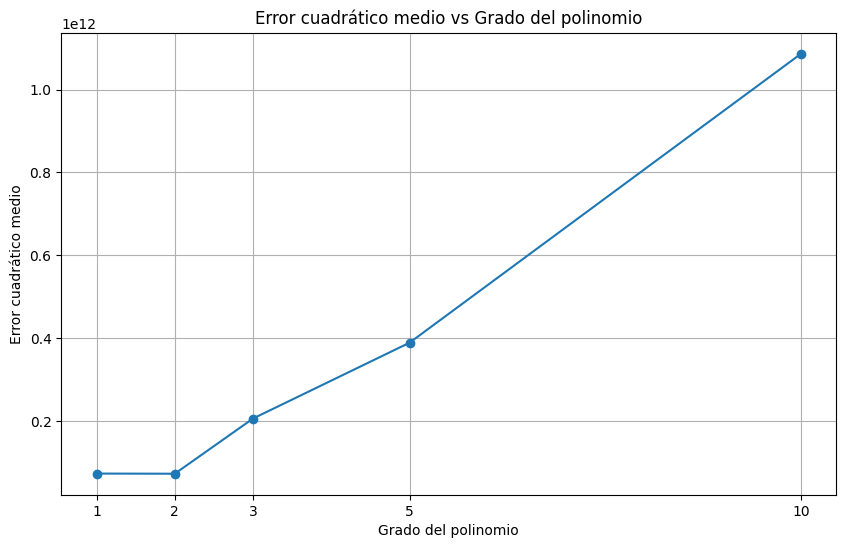

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_subset[['Total Volume']]
Y = df_subset['4046']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

# Ajustar diferentes grados de polinomios y calcular el error cuadrático medio en el conjunto de prueba
degrees = [1, 2, 3, 5, 10]
mse_list = []

for degree in degrees:
	poly_features = PolynomialFeatures(degree=degree)
	X_train_poly = poly_features.fit_transform(X_train)
	X_test_poly = poly_features.transform(X_test)

	model = LinearRegression()
	model.fit(X_train_poly, Y_train)

	Y_pred = model.predict(X_test_poly)
	mse = mean_squared_error(Y_test, Y_pred)
	mse_list.append(mse)

# Graficar el error cuadrático medio en función del grado del polinomio
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_list, marker='o')
plt.title('Error cuadrático medio vs Grado del polinomio')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático medio')
plt.xticks(degrees)
plt.grid(True)
plt.show()

Regresión Logarítmica

In [28]:
from scipy.optimize import curve_fit


X1 = df_subset['Total Volume']
Y1 = df_subset['4046']


def logarithmic_function(x, a, b):
	return a * np.log(X1) + b

# Ajustar la curva logarítmica a los datos
params, _ = curve_fit(logarithmic_function, X1, Y1)
a, b = params

print("Coeficiente 'a':", a)
print("Coeficiente 'b':", b)


Coeficiente 'a': 243235.44934494974
Coeficiente 'b': -2459515.4697670857


Códido sugerido por ChatGPT

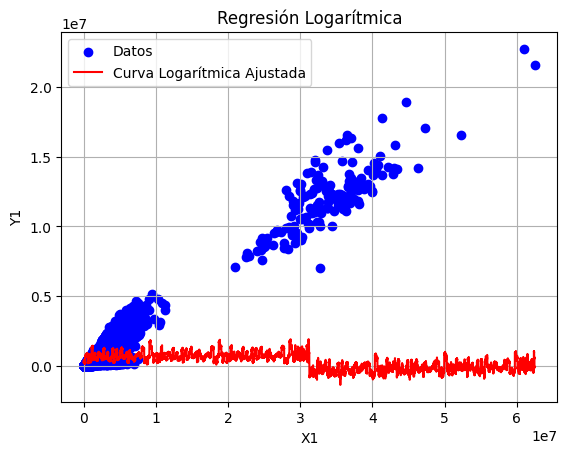

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.scatter(X1, Y1, color='blue', label='Datos')
x_fit = np.linspace(min(X1), max(X1), 18249)
y_fit = logarithmic_function(x_fit, *params)
plt.plot(x_fit, y_fit, color='red', label='Curva Logarítmica Ajustada')

# Configuración de la gráfica
plt.title('Regresión Logarítmica')
plt.xlabel('X1')
plt.ylabel('Y1')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

Regresión Logística

Código proporcinado por ChatGPT

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento escalados
model.fit(X_train_plot, y_train)

LogisticRegression()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


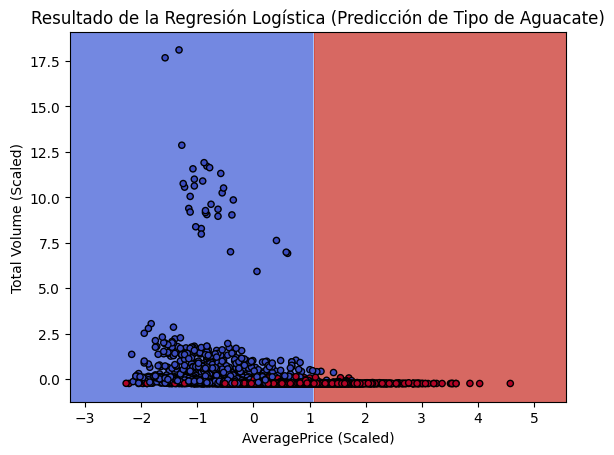

In [41]:
# Plotear el resultado del modelo
def plot_decision_boundary(X, y, model, scaler):
    h = .02  # Tamaño del paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('AveragePrice (Scaled)')
    plt.ylabel('Total Volume (Scaled)')
    plt.title('Resultado de la Regresión Logística (Predicción de Tipo de Aguacate)')
    plt.show()

# Preparar datos para plotear
X_plot = np.vstack((X_test_plot[:, 0], X_test_plot[:, 1])).T

# Plotear el resultado del modelo
plot_decision_boundary(X_plot, y_test, model, scaler)

In [35]:
# Hacer predicciones sobre los datos de prueba
y_pred = model.predict(X_test_scaled)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

# Mostrar la matriz de confusión y el reporte de clasificación
print('Matriz de Confusión:')
print(confusion_matrix(y_test, y_pred))
print('\nReporte de Clasificación:')
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.9205479452054794
Matriz de Confusión:
[[1627  193]
 [  97 1733]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1820
           1       0.90      0.95      0.92      1830

    accuracy                           0.92      3650
   macro avg       0.92      0.92      0.92      3650
weighted avg       0.92      0.92      0.92      3650

